# **Groupby w/ Pandas**

In [24]:
import pandas as pd

**Here we'll be using a clean form of the border crossing dataset.**

In [25]:
file = "Border_Crossing_Data_no_duplicates.csv"

In [26]:
df = pd.read_csv(file, parse_dates=['Date'])

In [27]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545


**Let's filter the dataframe to only Texas data and then group by the Date and Port Name columns. We'll then take the sum of the value column.**

In [28]:
df_grouped = df.loc[df['State']=='TX'].groupby(['Date', 'Port Name'])
df_grouped

**When we try to return the results of the groupby, all we see is a statement telling us we created a groupby object. We need to do some sort of aggregation to return a dataframe like we're accustomed to seeing.**

**Let's sum the 'value' column of the groupby object.**

In [29]:
df_grouped = df.loc[df['State']=='TX'].groupby(['Date', 'Port Name'])['Value'].sum()
df_grouped

Date        Port Name      
1996-01-01  Brownsville        2051069
            Del Rio             567985
            Eagle Pass          811378
            El Paso            4550013
            Hidalgo            2523205
                                ...   
2020-02-01  Presidio            166554
            Progreso            324813
            Rio Grande City     114019
            Roma                193255
            Tornillo-Fabens      96225
Name: Value, Length: 3242, dtype: int64

**We now see the results grouped by date and port name w/ the 3rd column representing the sum of 'value'.**

**However, notice that we don't have a name for the aggregated column. We'll show 2 ways to do this...**

**First, we can use the agg function and pass the name of the aggregation to a list, in which case it will name the column the same name as the aggregation.**

In [30]:
df_grouped = df.loc[df['State']=='TX'].groupby(['Date', 'Port Name'])['Value'].agg(['sum'])
df_grouped

sum
Date       Port Name               
1996-01-01 Brownsville      2051069
           Del Rio           567985
           Eagle Pass        811378
           El Paso          4550013
           Hidalgo          2523205
...                             ...
2020-02-01 Presidio          166554
           Progreso          324813
           Rio Grande City   114019
           Roma              193255
           Tornillo-Fabens    96225

[3242 rows x 1 columns]

**Another option is to assign a custom name to the column by passing our custom column name to the agg function and setting it equal to the desired aggregation.**

In [31]:
df_grouped = df.loc[df['State']=='TX'].groupby(['Date', 'Port Name'])['Value'].agg(sum_of_value = ('sum'))
df_grouped

sum_of_value
Date       Port Name                    
1996-01-01 Brownsville           2051069
           Del Rio                567985
           Eagle Pass             811378
           El Paso               4550013
           Hidalgo               2523205
...                                  ...
2020-02-01 Presidio               166554
           Progreso               324813
           Rio Grande City        114019
           Roma                   193255
           Tornillo-Fabens         96225

[3242 rows x 1 columns]

# **Pivoting w/ Pandas**

In [32]:
df_grouped.reset_index(level='Port Name', inplace=True)
df_grouped

,Port Name,sum_of_value
Date,,
1996-01-01,Brownsville,2051069
1996-01-01,Del Rio,567985
1996-01-01,Eagle Pass,811378
1996-01-01,El Paso,4550013
1996-01-01,Hidalgo,2523205
...,...,...
2020-02-01,Presidio,166554
2020-02-01,Progreso,324813
2020-02-01,Rio Grande City,114019


In [38]:
df_grouped_pivot = df_grouped.pivot(columns='Port Name', values='sum_of_value')
df_grouped_pivot

Port Name,Boquillas,Brownsville,Del Rio,Eagle Pass,El Paso,Hidalgo,Laredo,Presidio,Progreso,Rio Grande City,Roma,Tornillo-Fabens
Date,,,,,,,,,,,,
1996-01-01,NaN,2051069.0,567985.0,811378.0,4550013.0,2523205.0,2375956.0,179297.0,454788.0,217921.0,498441.0,203289.0
1996-02-01,NaN,1970246.0,536422.0,755100.0,4524181.0,2391473.0,2518415.0,164936.0,476722.0,212232.0,462969.0,209479.0
1996-03-01,NaN,2299903.0,625731.0,857938.0,4877035.0,2725731.0,2845700.0,188573.0,533102.0,234086.0,522402.0,237367.0
1996-04-01,NaN,2125894.0,615821.0,835141.0,5412770.0,2636880.0,2534405.0,186017.0,405265.0,220480.0,502515.0,220155.0
1996-05-01,NaN,2222537.0,635405.0,855895.0,5594824.0,2699768.0,2516427.0,195282.0,374366.0,228725.0,488741.0,211976.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,1700.0,1485493.0,397219.0,843158.0,3404360.0,1322953.0,2080900.0,188747.0,437979.0,116543.0,200204.0,112824.0
2019-11-01,3498.0,1488685.0,381458.0,863813.0,3241756.0,1400983.0,2002562.0,190295.0,460862.0,119714.0,208190.0,108610.0
2019-12-01,2467.0,1616708.0,419092.0,954586.0,3499006.0,1565152.0,2222830.0,226700.0,483575.0,136226.0,243880.0,122691.0


In [37]:
df_grouped.columns

Index(['Port Name', 'sum_of_value'], dtype='object')

In [62]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

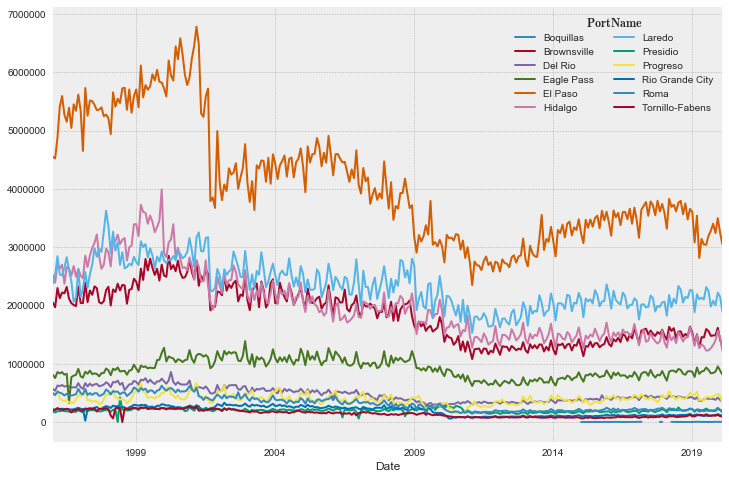

In [65]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
df_grouped_pivot.plot(figsize=(12,8))
plt.legend(title=r"$\bf{Port Name}$", title_fontsize = 'large', ncol=2, frameon=False)